## Alexnet

In [1]:
import tensorflow as tf

In [79]:
input_=tf.keras.Input((227,227,3))

x=tf.keras.layers.Conv2D(96,11,4)(input_)
x=tf.keras.layers.MaxPool2D(3,2)(x)

x=tf.keras.layers.Conv2D(256,5, padding='same', activation='relu')(x)
x=tf.keras.layers.MaxPool2D(3,2)(x)

x=tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu', bias_initializer='ones')(x)
x=tf.keras.layers.Conv2D(384, 3, padding='same', activation='relu')(x)
x=tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x=tf.keras.layers.MaxPool2D(3,2)(x)

x=tf.keras.layers.Flatten()(x)

x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(4096, activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(1000, activation='softmax')(x)

In [77]:
import tensorflow_addons as tfa

In [80]:
model=tf.keras.Model(input_, x)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tfa.optimizers.SGDW(weight_decay=0.0005, momentum=0.9))

model.weights[1]

<tf.Variable 'conv2d_149/bias:0' shape=(96,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [81]:
model.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_149 (Conv2D)         (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_150 (Conv2D)         (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_151 (Conv2D)         (None, 13, 13, 384)       885

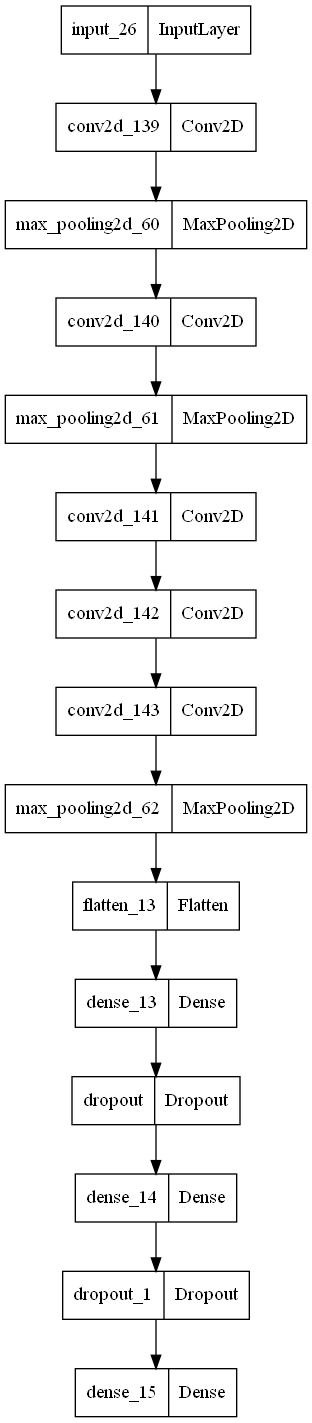

In [76]:
tf.keras.utils.plot_model(model)

## Alexnet (메모리부족으로 인한 모델 쪼개기(논문상))

In [67]:
x = tf.keras.layers.Conv2D(48, 11, 4)(input_)
x = tf.keras.layers.MaxPool2D(3,2)(x)
xx = tf.keras.layers.Conv2D(128, 5, padding='same')(x)

y = tf.keras.layers.Conv2D(48, 11, 4)(input_)
y = tf.keras.layers.MaxPool2D(3,2)(y)
yy = tf.keras.layers.Conv2D(128, 5, padding='same')(y)

i = tf.keras.layers.Concatenate()([xx,yy])
i = tf.keras.layers.Conv2D(192, 3, padding='same')(i)
i = tf.keras.layers.Conv2D(192, 3, padding='same')(i)
i = tf.keras.layers.Conv2D(128, 3, padding='same')(i)
i = tf.keras.layers.MaxPool2D(3,2)(i)
i = tf.keras.layers.Flatten()(i)

j = tf.keras.layers.Concatenate()([xx,yy])
j = tf.keras.layers.Conv2D(192, 3, padding='same')(j)
j = tf.keras.layers.Conv2D(192, 3, padding='same')(j)
j = tf.keras.layers.Conv2D(128, 3, padding='same')(j)
j = tf.keras.layers.MaxPool2D(3,2)(j)
j = tf.keras.layers.Flatten()(j)

k = tf.keras.layers.Concatenate()([i,j])
k = tf.keras.layers.Dense(2048)(k)

l = tf.keras.layers.Concatenate()([i,j])
l = tf.keras.layers.Dense(2048)(l)

m = tf.keras.layers.Concatenate()([k,l])
m = tf.keras.layers.Dense(2048)(m)

n = tf.keras.layers.Concatenate()([k,l])
n = tf.keras.layers.Dense(2048)(n)

t = tf.keras.layers.Concatenate()([n,m])
t = tf.keras.layers.Dense(1000, activation='softmax')(t)

In [68]:
model2=tf.keras.Model(input_, t)
model2.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_129 (Conv2D)            (None, 55, 55, 48)   17472       ['input_25[0][0]']               
                                                                                                  
 conv2d_131 (Conv2D)            (None, 55, 55, 48)   17472       ['input_25[0][0]']               
                                                                                                  
 max_pooling2d_56 (MaxPooling2D  (None, 27, 27, 48)  0           ['conv2d_129[0][0]']      

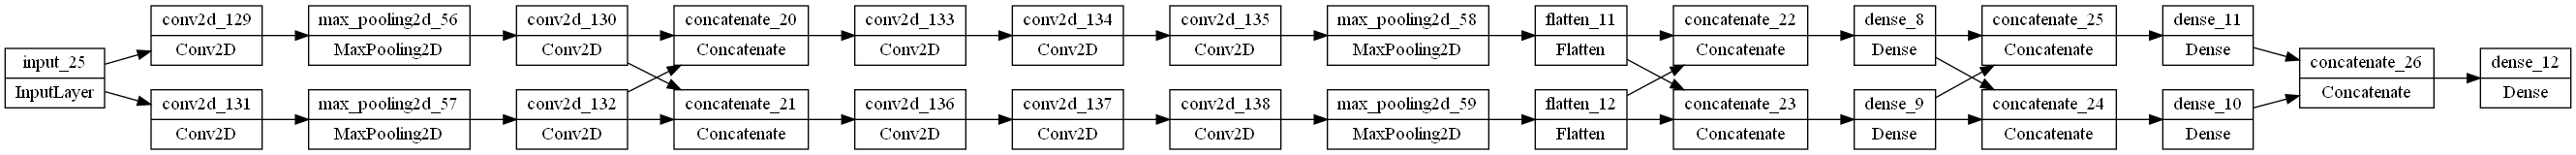

In [69]:
tf.keras.utils.plot_model(model2, rankdir='LR')

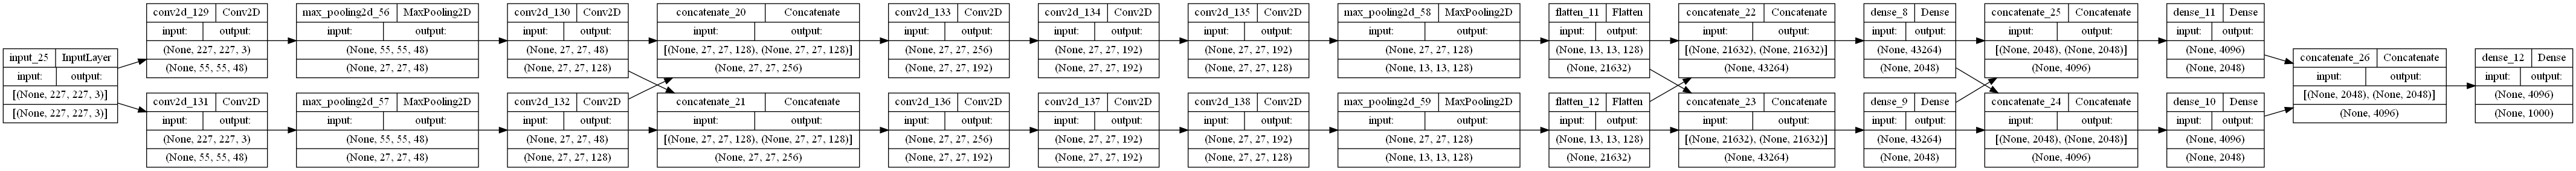

In [70]:
tf.keras.utils.plot_model(model2, rankdir='LR', show_shapes=True)